# Random forest

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

### Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import graphviz 
from sklearn import tree
from sklearn import preprocessing


### Hyperparmeters

In [4]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = False
split_size = (0.9, 0.0, 0.1)

### Get the data

In [5]:

y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

## Model

### Create and train the model

In [6]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
print(rf)

RandomForestClassifier()


## Evaluation

### Predict the test set

In [7]:
y_prob = rf.predict(x_test)
y_pred = np.round(y_prob)

In [8]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.50%


### Apply the evaluation metrics

Precision Score:
0.7151162790697675

Recall Score:
0.6955357142857143

F1-Score:
0.7051901025950513

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2566   931
Sick        1023  2337



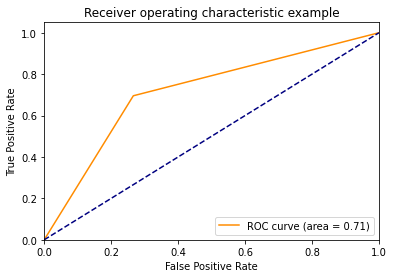


ROC Score:
0.7146537593447445


In [9]:
show_evaluation(y_test, y_pred, y_prob)